# Importing Libraries


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit


# Reading The Data

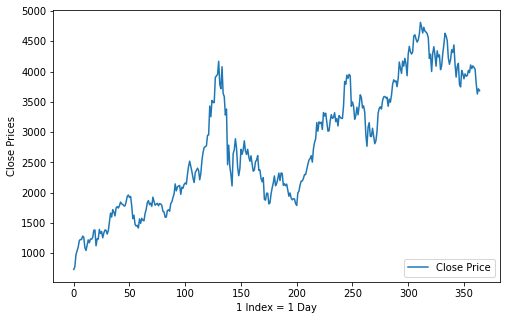

In [111]:
# SEC_KEY = '7mi6lnaTynfrzxfDYyYUarBpUJ35sSgVEVIj6RZG'
# PUB_KEY ='PKDL8E9SBYH9GYYXXZNL'
# BASE_URL ='https://paper-api.alpaca.markets'
# symb = "AMZN"
# api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
# df = api.get_barset(symb, TimeFrame(15, TimeFrameUnit.Minute), limit=1000).df  # Get one bar object for each of the past 5 minutes
# df=df[symb]
# df['Close']=df['close']
# df['High']=df['high']
# df['Low']=df['low']
# df['Open']=df['open']
# df['Volume']=df['volume']
# plt.figure(figsize=(18,7))
# df.dropna(inplace=True)
# df = df.reset_index(drop=True)
# plt.plot(df['Close'] )
# plt.title(symb,size=42)
# plt.grid()
# plt.show()
df=pd.read_csv('ETH-USD.csv')
temp=pd.read_csv('RSI_data.csv')
# plt.xlim([-2,210])
plt.figure(figsize=(8,5))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'],label='Close Price' )
# plt.title("BTC/USD",size=32)
plt.legend(loc='lower right')
plt.xlabel("1 Index = 1 Day")
plt.ylabel("Close Prices")
plt.show()

# RSI Indicator Visualizastion

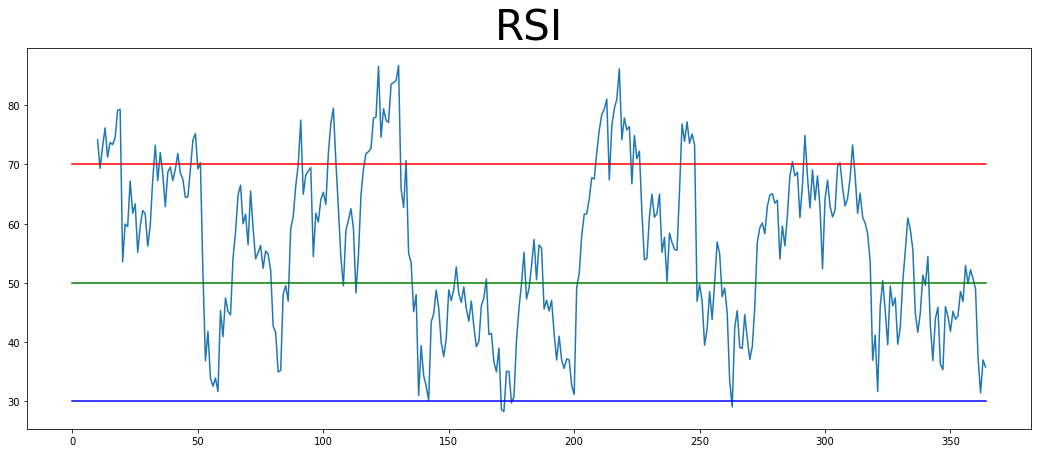

In [112]:
df['rsi'] = ta.RSI(df['Close'], timeperiod=10)
df['rsi at 70'] = 70
df['rsi at 30'] = 30
df['rsi at 50'] = 50
plt.figure(figsize=(18,7))
plt.plot(df['rsi'] )
plt.plot(df['rsi at 70'],color='r')
plt.plot(df['rsi at 30'],color='b')
plt.plot(df['rsi at 50'],color='g')
plt.title('RSI',size=42)

plt.show()

# Empty Arrays

In [113]:
buy=[0]
sell=[0]
Profit=[0]
Stop_loss=[0]
position_Buy=None
position_Sell=None

# Decision Making Process


Profit = 17
Stop_loss = 4
PROFITIBLITY 80.95238095238095


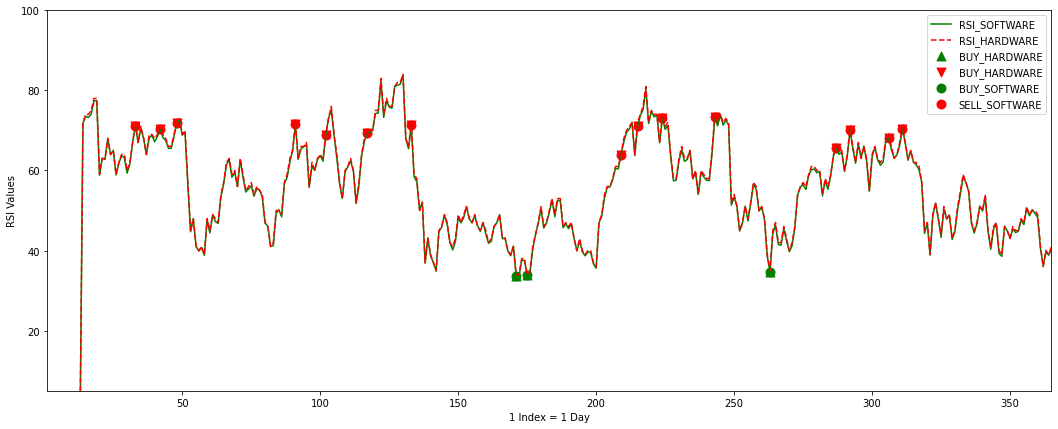

In [114]:

for i in range(1,len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i-1]>=30 and df['rsi'][i]<30 and  position_Buy!="Buy" :
        buy.append(temp['rsi'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i-1]<=70 and df['rsi'][i]>70  and  position_Sell!="Sell" :
        sell.append(temp['rsi'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

# ######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=35 :
            Stop_loss.append(np.nan)
            Profit.append(temp['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=20 :
            Stop_loss.append(temp['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=65:
            Stop_loss.append(np.nan)
            Profit.append(temp['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=80:
            Stop_loss.append(temp['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(temp['rsi'],color='g',label='RSI_SOFTWARE')
plt.plot(temp['RSI'],linestyle='--',color='r',label='RSI_HARDWARE')
temp['buy']=df['buy']
temp['sell']=df['sell']

plt.scatter(df.index,df['buy'],marker='^',color='g',s=80,label='BUY_HARDWARE')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=80,label='BUY_HARDWARE')
plt.scatter(temp.index,temp['buy'],marker='o',color='g',s=80,label='BUY_SOFTWARE')
plt.scatter(temp.index,temp['sell'],marker="o",color='r',s=80,label='SELL_SOFTWARE')
# plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
# plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
# plt.plot(df['rsi at 70'])
# plt.plot(df['rsi at 30'])
# plt.plot(df['rsi at 50'])
# plt.title('RSI',size=42)
plt.xlim([1,365])
plt.ylim([5,100])
plt.legend()
plt.xlabel("1 Index = 1 Day")
plt.ylabel("RSI Values")
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [115]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

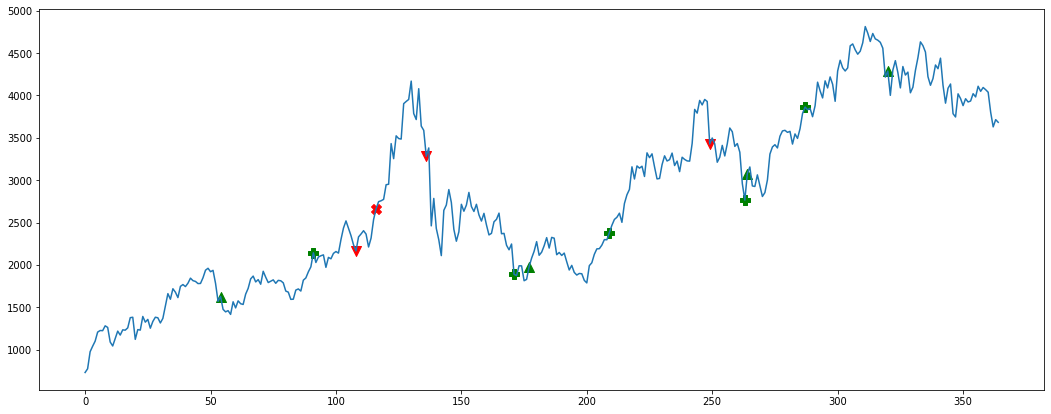

In [116]:
df['future_returns'] = df['Close'].pct_change().shift(-3)
for i in range(0,len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]>=40 and df['rsi'][i]<45.0 and position_Buy!="Buy" and position_Sell!="Sell"   :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50.0 and df['rsi'][i]>45.0 and position_Sell!="Sell" and position_Buy!="Buy"  :
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.show()
df.to_csv('azaz.csv')